# Assignment 03:


This Week's assignment we will use machine learning model to predict the temperature at 3PM (Temp3pm) using sklearn.


Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 03: - Muntahder Al-kaabi).

<br>
Dataset:


**Date** - The date of observation 

**Location** - The common name of the location of the weather station

**MinTemp** - The minimum temperature in degrees celsius

**MaxTemp** The maximum temperature in degrees celsius

**Rainfall** - The amount of rainfall recorded for the day in mm

**Evaporation** - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

**Sunshine** - The number of hours of bright sunshine in the day.

**WindGustDir** - The direction of the strongest wind gust in the 24 hours to midnight

**WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

**WindDir9am** - Direction of the wind at 9am

**WindDir3pm** -Direction of the wind at 3pm

**WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am

**WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

**Humidity9am** - Humidity (percent) at 9am

**Humidity3pm** - Humidity (percent) at 3pm

**Pressure9am** - Atmospheric pressure (hpa) reduced to mean sea level at 9am

**Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

**Cloud9am** - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many 

**Cloud3pm** - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

**Temp9amTemperature** - (degrees C) at 9am

**Temp3pmTemperature** - (degrees C) at 3pm

**RainToday** - Boolean 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

**RainTomorrow** - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

<br>

Requirements:

1. Import all necessary libraries.
2. Read the dataset csv file using pandas.
3. Describe the dataset using pandas.
4. Show the dataset info.
5. Get the number of missing values in dataset for each columns.
6. Remove all the missing values.
6. Get the correlations between columns.
4. Drop the following columns 'Location','Date', 'RainToday', 'RainTomorrow', 'WindGustDir','WindDir9am' , 'WindDir3pm
7. Split the data to features and target.
8. Print the features.
9. Print the target.
10. Normalize the target.
11. Split the data to training and testing datasets.
12. Create a pipeline with the standered scaler and Linear regression. 
13. Train the pipeline.
13. Evaluate your pipeline.
14. Predict the Temp3pm for the first 10 samples form x_test.


Find relevant links below:

Good luck and feel free to ask any question.

In [1]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayajafar","key":"33ec85a5087e4f11468a42ff2bd6dcd7"}'}

In [2]:
! rm -r ~/.kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

 78% 3.00M/3.83M [00:00<00:00, 5.56MB/s]
100% 3.83M/3.83M [00:00<00:00, 5.76MB/s]


In [4]:
! unzip /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


## Import Labraries

In [5]:
# Write your code below 

# code start here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    datasets,
    model_selection,
    linear_model,
    preprocessing,
)
# code end here

## Read the Data

In [6]:
# Read the dataset csv file using pandas

# code start here
df = pd.read_csv('weatherAUS.csv')
# code end here

In [7]:
# Show the pandas DataFrame 
# code start here
df
# code end here

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Describe The Data

In [8]:
# Describe the dataset using pandas 
# code start here
df.describe().T
# code end here

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## Show The Dataset Info

In [9]:
# Show the dataset info
# code start here
df.info()
# code end here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Get The Number Of Missing Values

In [10]:
# Get the number of missing values in dataset for each columns 
# code start here
df.isna().sum()
# code end here

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Remove All The Missing Values.

In [11]:
# Remove all the missing values.
# code start here
df.dropna(inplace=True)
# code end here

In [12]:
df.shape

(56420, 23)

## Get The Correlation


In [13]:
# Get the correlations between columns 
# code start here
df.corr()
# code end here

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


## Drop The Columns

In [14]:
# Drop the following columns 'Location','Date', 'RainToday', 'RainTomorrow', 'WindGustDir','WindDir9am' , 'WindDir3pm'
# code start here
df.drop(['Location','Date','RainToday','RainTomorrow','WindGustDir','WindDir9am' , 'WindDir3pm'],axis=1,inplace=True)
# code end here

## Split The Data To Features And Target

In [15]:
x = df.drop(columns=['Temp3pm'])
y = df['Temp3pm']

# Spilt the Data to Train & Test 

In [64]:
y_normalizer = preprocessing.MinMaxScaler()
y_normalizer.fit(y.to_numpy().reshape(-1,1))
y_scaler = y_normalizer.transform(y.to_numpy().reshape(-1,1))

In [65]:
# code start here
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y_scaler, test_size=0.3, random_state=42,
)
# code end here

In [66]:
x_train.shape , y_train.shape

((39494, 15), (39494, 1))

In [67]:
x_test.shape , y_test.shape

((16926, 15), (16926, 1))

# Create the Data Pipeline

In [19]:
from sklearn.pipeline import Pipeline

In [54]:
# code start here
pipe = Pipeline([
                 ('scaler', preprocessing.StandardScaler()),
                 ('Linear_R', linear_model.LinearRegression())
              ])
# code end here

## Train The Pipeline.

In [55]:
# Train the pipeline.
# code start here
pipe.fit(x_train, y_train)
# code end here

Pipeline(steps=[('scaler', StandardScaler()), ('Linear_R', LinearRegression())])

# Model Evaluation 

In [56]:
# Evaluate your pipeline.
# code start here
pipe.score(x_test,y_test)
# code end here

0.9821407064435793

## Predict The Values

In [60]:
# Predict the Temp3pm for the first 10 samples form x_test.
# code start here
pred = pipe.predict(x_test[:10])
pred
# code end here

array([[0.44504798],
       [0.61375977],
       [0.32709142],
       [0.32198916],
       [0.34784443],
       [0.57067815],
       [0.64631808],
       [0.3605352 ],
       [0.27174773],
       [0.42809812]])

Expected output

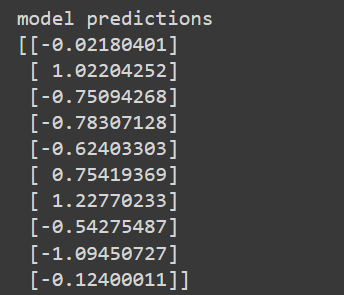

In [68]:
# Inverse transform the predictions .
# code start here
y_normalizer.inverse_transform(pred)
# code end here

array([[22.57003445],
       [29.7234143 ],
       [17.56867641],
       [17.35234051],
       [18.44860362],
       [27.89675339],
       [31.10388646],
       [18.98669263],
       [15.22210356],
       [21.85136008]])

Expected output

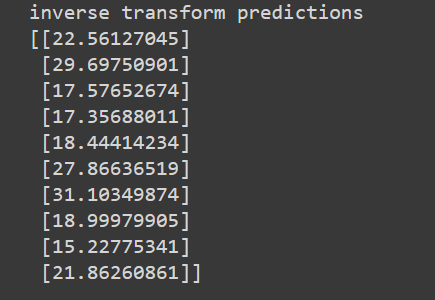